In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# NP31

# depth

In [2]:
dep31 = pd.read_excel(r"C:\Users\Default\Documents\transect_depths.xlsx", engine='openpyxl', sheet_name='31', index_col=0, parse_dates=True)
dep31.loc['avg'] = dep31.mean()
dep31.loc['std'] = dep31.std()

dep31_transposed = dep31.T
dep31_transposed = dep31_transposed.resample('10D').mean()

dep31_transposed.reset_index(inplace=True)
dep31_transposed['day'] = dep31_transposed['index'].dt.day
dep31_transposed['month'] = dep31_transposed['index'].dt.month
dep31_transposed['year'] = dep31_transposed['index'].dt.year

dep31_transposed = dep31_transposed.sort_values(by="index")
dep31_transposed.set_index('index', inplace=True)

dep31_transposed

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,avg,std,day,month,year
index,,,,,,,,,,,,,,,,,,,,,
1988-12-10,10.0,45.0,36.0,23.0,30.0,23.0,23.0,12.0,36.0,12.0,...,10.0,14.0,26.0,37.0,36.0,26.960784,11.965573,10,12,1988
1988-12-20,20.0,49.0,32.0,28.0,23.0,25.0,40.0,16.0,21.0,20.0,...,16.0,10.0,15.0,30.0,26.0,26.000000,11.318907,20,12,1988
1988-12-30,30.0,44.0,30.0,28.0,26.0,20.0,39.0,30.0,20.0,21.0,...,30.0,14.0,19.0,27.0,25.0,28.215686,10.646391,30,12,1988
1989-01-09,10.0,25.0,28.0,12.0,54.0,29.0,32.0,22.0,45.0,61.0,...,56.0,32.0,37.0,52.0,29.0,30.686275,12.674647,9,1,1989
1989-01-19,21.0,31.0,27.0,29.0,46.0,28.0,19.0,31.0,21.0,41.0,...,20.0,28.0,29.0,50.0,37.0,30.215686,9.504001,19,1,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991-02-18,20.0,31.0,37.0,22.0,30.0,38.0,50.0,62.0,44.0,28.0,...,23.0,10.0,46.0,48.0,8.0,32.784314,14.925059,18,2,1991
1991-02-28,28.0,38.0,43.0,40.0,56.0,35.0,22.0,48.0,35.0,29.0,...,54.0,38.0,41.0,37.0,21.0,35.960784,13.042857,28,2,1991
1991-03-10,10.0,36.0,49.0,30.0,38.0,45.0,50.0,50.0,38.0,31.0,...,25.0,21.0,16.0,37.0,40.0,35.666667,14.505802,10,3,1991


# density

In [4]:
import pandas as pd
df31 = pd.read_excel(r'C:\Users\Default\Documents\transect_densities.xlsx', engine='openpyxl', sheet_name='31', index_col=0, parse_dates=True)
df31.loc['avg'] = df31.mean()
df31.loc['stdv'] = df31.std()

df31 = df31.T
df31 = df31.resample('10D').mean()

df31.reset_index(inplace=True)
df31['day'] = df31['index'].dt.day
df31['month'] = df31['index'].dt.month
df31['year'] = df31['index'].dt.year

rols = ['day', 'month', 'year']
df31['day_month_year'] = df31[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

cols = ['month', 'year']
df31['month_year'] = df31[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

df31 = df31.sort_values(by="index")
df31.set_index('index', inplace=True)

df31_boxplot = df31.T

cols = ['month']
df31[cols] = df31[df31[cols] != 5][cols]
df31.dropna(inplace=True)
    
cols = ['month']
df31[cols] = df31[df31[cols] != 6][cols]
df31.dropna(inplace=True)

cols = ['month']
df31[cols] = df31[df31[cols] != 7][cols]
df31.dropna(inplace=True)

cols = ['month']
df31[cols] = df31[df31[cols] != 8][cols]
df31.dropna(inplace=True)

df31

,0,1,2,3,4,5,6,7,8,9,avg,stdv,day,month,year,day_month_year,month_year
index,,,,,,,,,,,,,,,,,
1988-12-10,0.31,0.30,0.36,0.33,0.22,0.22,0.35,0.29,0.35,0.33,0.306,0.048000,10,12.0,1988,10-12-1988,12-1988
1988-12-20,0.31,0.36,0.21,0.32,0.30,0.30,0.27,0.33,0.30,0.29,0.299,0.037537,20,12.0,1988,20-12-1988,12-1988
1988-12-30,0.31,0.30,0.29,0.28,0.28,0.34,0.28,0.32,0.31,0.31,0.302,0.018868,30,12.0,1988,30-12-1988,12-1988
1989-01-09,0.30,0.32,0.37,0.36,0.30,0.35,0.33,0.30,0.34,0.32,0.329,0.024269,9,1.0,1989,9-1-1989,1-1989
1989-01-19,0.31,0.28,0.35,0.32,0.35,0.34,0.34,0.37,0.36,0.35,0.337,0.025318,19,1.0,1989,19-1-1989,1-1989
1989-01-29,0.31,0.34,0.40,0.37,0.37,0.27,0.28,0.34,0.38,0.38,0.344,0.042237,29,1.0,1989,29-1-1989,1-1989
1989-02-08,0.33,0.34,0.33,0.32,0.30,0.30,0.32,0.37,0.35,0.33,0.329,0.020224,8,2.0,1989,8-2-1989,2-1989
1989-02-18,0.35,0.30,0.35,0.31,0.32,0.32,0.30,0.30,0.35,0.33,0.323,0.020025,18,2.0,1989,18-2-1989,2-1989
1989-02-28,0.35,0.31,0.33,0.34,0.36,0.33,0.30,0.32,0.32,0.33,0.329,0.017000,28,2.0,1989,28-2-1989,2-1989


# Meteorological data

In [5]:
dm31 = pd.read_table(r"C:\Users\Default\Documents\W99_clean\MET\METNP_31.DAT",sep="\s+", index_col=False, header=None, na_values=9999, names=['station_id', 'year', 'month', 'day','time', 'lat', 'long', 'air_temperature', 'relative_humidity', 'sea_level_pressure', 'wind_direction', 'wind_speed', 'total_cloudiness', 'low_cloudiness', 'surface_temperature'])

dm31.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

cols = ['year', 'month', 'day']
dm31['date'] = dm31[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
dm31['date'] = pd.to_datetime(dm31.date, infer_datetime_format=True)

dm31.set_index('date', inplace=True)

# adding month_year
rols = ['month', 'year']
dm31['month_year'] = dm31[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

dm31 = dm31.resample('D').mean()

cols = ['wind_speed']
dm31[cols] = dm31[dm31[cols] > 0][cols]
dm31.dropna()

dm31


,station_id,year,month,day,time,lat,long,air_temperature,relative_humidity,sea_level_pressure,wind_direction,wind_speed,total_cloudiness,low_cloudiness,surface_temperature
date,,,,,,,,,,,,,,,
1988-12-01,31.0,88.0,12.0,1.0,21.000000,76.167000,-154.100000,-32.800000,79.000000,1009.100000,320.000000,4.000000,6.000000,0.0,-33.000000
1988-12-02,31.0,88.0,12.0,2.0,10.500000,76.167000,-154.128000,-33.262500,79.125000,1010.687500,283.750000,4.625000,1.625000,0.0,-34.375000
1988-12-03,31.0,88.0,12.0,3.0,10.500000,76.157250,-154.112500,-32.900000,79.125000,1011.000000,256.250000,4.625000,5.375000,0.0,-34.000000
1988-12-04,31.0,88.0,12.0,4.0,10.500000,76.150000,-153.933375,-34.812500,78.000000,1008.300000,195.000000,4.000000,2.125000,0.0,-36.250000
1988-12-05,31.0,88.0,12.0,5.0,10.500000,76.159375,-153.779125,-32.800000,79.250000,1006.787500,180.000000,5.125000,7.250000,0.0,-33.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991-03-27,31.0,91.0,3.0,27.0,10.500000,72.103625,-148.814250,-28.237500,83.000000,1012.175000,243.750000,6.875000,4.875000,0.0,-26.750000
1991-03-28,31.0,91.0,3.0,28.0,10.500000,72.102000,-148.799250,-29.800000,80.875000,1003.962500,238.125000,3.500000,3.125000,0.0,-27.375000
1991-03-29,31.0,91.0,3.0,29.0,10.500000,72.101500,-148.800125,-29.100000,81.750000,1002.550000,45.000000,0.500000,3.375000,0.0,-27.375000


# boxplot

In [6]:
df = pd.DataFrame({"surf_temperature":dm31.surface_temperature, "average_density":df31.iloc[:,10], "stdv_density":df31.iloc[:,11], "1":df31.iloc[:,1], "2":df31.iloc[:,2], "3":df31.iloc[:,3], "4":df31.iloc[:,4], "5":df31.iloc[:,5], "6":df31.iloc[:,6], "7":df31.iloc[:,7], "8":df31.iloc[:,8],"9":df31.iloc[:,9]}, index=None, columns=None)
df = df.resample('10D').mean()                   

df.reset_index(inplace=True)
df['day'] = df['index'].dt.day
df['month'] = df['index'].dt.month
df['year'] = df['index'].dt.year
df.set_index('index', inplace=False)

rols = ['day','month', 'year']
df['day_month_year'] = df[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

df 

,index,surf_temperature,average_density,stdv_density,1,2,3,4,5,6,7,8,9,day,month,year,day_month_year
0,1988-12-01,-31.950000,0.306,0.048000,0.30,0.36,0.33,0.22,0.22,0.35,0.29,0.35,0.33,1,12,1988,1-12-1988
1,1988-12-11,-25.200000,0.299,0.037537,0.36,0.21,0.32,0.30,0.30,0.27,0.33,0.30,0.29,11,12,1988,11-12-1988
2,1988-12-21,-27.787500,0.302,0.018868,0.30,0.29,0.28,0.28,0.34,0.28,0.32,0.31,0.31,21,12,1988,21-12-1988
3,1988-12-31,-23.925000,0.329,0.024269,0.32,0.37,0.36,0.30,0.35,0.33,0.30,0.34,0.32,31,12,1988,31-12-1988
4,1989-01-10,-33.362500,0.337,0.025318,0.28,0.35,0.32,0.35,0.34,0.34,0.37,0.36,0.35,10,1,1989,10-1-1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1991-02-19,-29.076667,0.341,0.027731,0.30,0.38,0.37,0.37,0.31,0.36,0.31,0.32,0.34,19,2,1991,19-2-1991
82,1991-03-01,-27.632143,0.346,0.027641,0.38,0.30,0.35,0.31,0.38,0.36,0.33,0.32,0.36,1,3,1991,1-3-1991
83,1991-03-11,-32.048333,0.348,0.025219,0.36,0.31,0.38,0.37,0.33,0.37,0.38,0.32,0.33,11,3,1991,11-3-1991
84,1991-03-21,-29.130357,0.345,0.031064,0.38,0.36,0.39,0.32,0.32,0.38,0.33,0.30,0.36,21,3,1991,21-3-1991


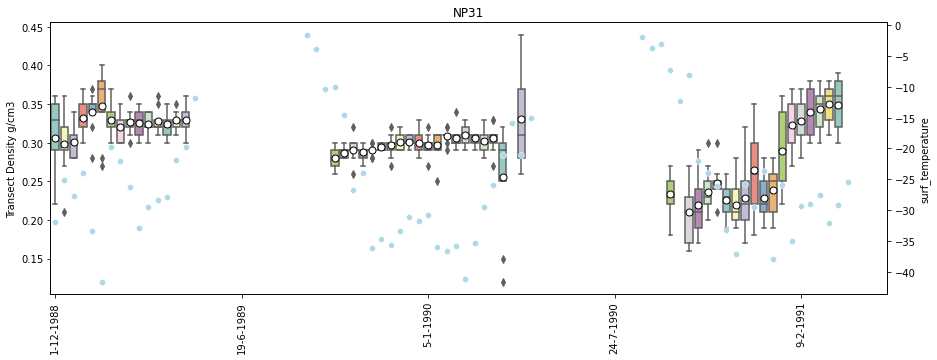

In [7]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df.iloc[:,4:13].T, ax=ax, showmeans=True, palette="Set3",meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"})

ax2 = ax.twinx()
sns.scatterplot(x=df.index, y='surf_temperature', data=df, ax=ax2, ci=None, color='lightblue')

ax.set_ylabel('Transect Density g/cm3')

ax.set_xticks(df.index[::20])
ax.set_xticklabels(df.day_month_year[::20], rotation=90)
plt.title('NP31')

plt.show()

# Surface & Air temp.

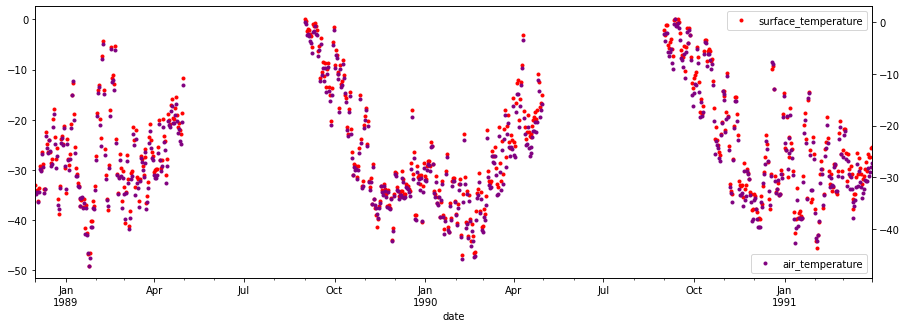

In [8]:
plt.figure(figsize=(15,5))
dm31.surface_temperature.plot(color='red', style='.') #no need to specify for first axis
plt.legend()
dm31.air_temperature.plot(kind='line', secondary_y=True, ax=plt.gca(), style=".", color='purple')
plt.legend(loc='lower right')

# surface temp. & density stdv

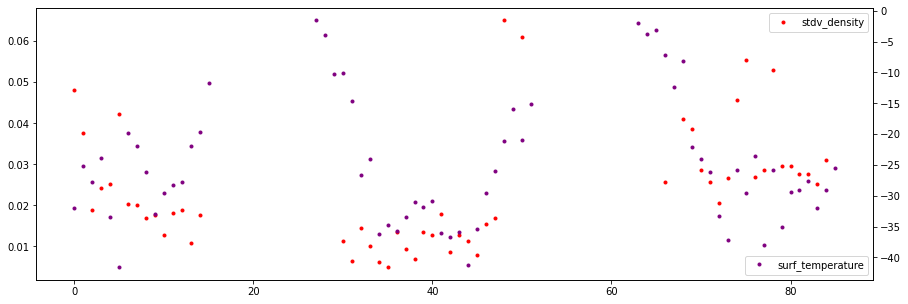

In [10]:
plt.figure(figsize=(15,5))
df.stdv_density.plot(color='red', style='.') #no need to specify for first axis
plt.legend()
df.surf_temperature.plot(kind='line', secondary_y=True, ax=plt.gca(), style=".", color='purple')
plt.legend(loc='lower right')

# regression

In [35]:
df2 = pd.DataFrame({"surf_temperature":dm31.surface_temperature, "average_density":df31.iloc[:,10].diff(), "stdv_density":df31.iloc[:,11], "avg_depth": dep31_transposed.iloc[:,51]}, index=None, columns=None)
df2 = df2.resample('10D').mean()                   

df2 = df2.dropna()
df2 

,surf_temperature,average_density,stdv_density,avg_depth
1988-12-11,-25.200000,-6.999998e-03,0.037537,26.000000
1988-12-21,-27.787500,2.999996e-03,0.018868,28.215686
1988-12-31,-23.925000,2.700000e-02,0.024269,30.686275
1989-01-10,-33.362500,7.999995e-03,0.025318,30.215686
1989-01-20,-41.625000,7.000002e-03,0.042237,31.000000
1989-01-30,-19.810119,-1.500000e-02,0.020224,36.529412
1989-02-09,-22.001786,-6.000003e-03,0.020025,38.843137
1989-02-19,-26.192857,6.000003e-03,0.017000,37.333333
1989-03-01,-32.875000,-9.999990e-04,0.017776,41.647059
1989-03-11,-29.512500,-3.000003e-03,0.012845,40.274510


In [36]:
sp.stats.linregress(df2.surf_temperature,df2.average_density)
res = sp.stats.linregress(df2.surf_temperature,df2.average_density)
res

LinregressResult(slope=-0.0011360707072436648, intercept=-0.031026883448121646, rvalue=-0.37407236198552013, pvalue=0.0062978612128431095, stderr=0.0003983195331844517)

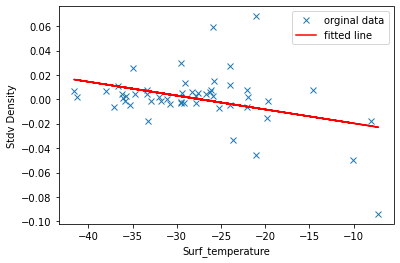

In [37]:
plt.plot(df2.surf_temperature, df2.average_density, 'x', label='orginal data')
plt.plot(df2.surf_temperature, res.intercept + res.slope*df2.surf_temperature, 'r', label='fitted line')

plt.legend()

plt.xlabel('Surf_temperature')
plt.ylabel('Stdv Density')
plt.show()

# NP30

# density

In [14]:
import pandas as pd
df30 = pd.read_excel(r'C:\Users\Default\Documents\transect_densities.xlsx', engine='openpyxl', sheet_name='30', index_col=0, parse_dates=True)
df30.loc['avg'] = df30.mean()
df30.loc['stdv'] = df30.std()

df30 = df30.T
df30 = df30.resample('10D').mean()

df30.reset_index(inplace=True)
df30['day'] = df30['index'].dt.day
df30['month'] = df30['index'].dt.month
df30['year'] = df30['index'].dt.year

rols = ['day', 'month', 'year']
df30['day_month_year'] = df30[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

cols = ['month', 'year']
df30['month_year'] = df30[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

df30 = df30.sort_values(by="index")
df30.set_index('index', inplace=True)

df30_boxplot = df30.T

cols = ['month']
df30[cols] = df30[df30[cols] != 5][cols]
df30.dropna(inplace=True)
    
cols = ['month']
df30[cols] = df30[df30[cols] != 6][cols]
df30.dropna(inplace=True)

cols = ['month']
df30[cols] = df30[df30[cols] != 7][cols]
df30.dropna(inplace=True)

cols = ['month']
df30[cols] = df30[df30[cols] != 8][cols]
df30.dropna(inplace=True)

df30

,0,1,2,3,4,5,6,7,8,9,avg,stdv,day,month,year,day_month_year,month_year
index,,,,,,,,,,,,,,,,,
1987-11-10,0.29,0.26,0.23,0.25,0.26,0.26,0.28,0.23,0.23,0.29,0.258,0.022271,10,11.0,1987,10-11-1987,11-1987
1987-11-20,0.32,0.37,0.26,0.33,0.32,0.38,0.34,0.28,0.35,0.32,0.327,0.034943,20,11.0,1987,20-11-1987,11-1987
1987-11-30,0.30,0.29,0.26,0.29,0.30,0.29,0.31,0.32,0.32,0.27,0.295,0.018574,30,11.0,1987,30-11-1987,11-1987
1987-12-10,0.28,0.30,0.26,0.31,0.28,0.29,0.27,0.26,0.28,0.25,0.278,0.017776,10,12.0,1987,10-12-1987,12-1987
1987-12-20,0.29,0.27,0.32,0.29,0.32,0.29,0.30,0.32,0.30,0.21,0.291,0.031129,20,12.0,1987,20-12-1987,12-1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991-01-23,0.20,0.21,0.26,0.20,0.20,0.21,0.30,0.22,0.23,0.28,0.231,0.034482,23,1.0,1991,23-1-1991,1-1991
1991-02-02,0.23,0.21,0.30,0.29,0.22,0.20,0.26,0.24,0.22,0.31,0.248,0.037630,2,2.0,1991,2-2-1991,2-1991
1991-02-12,0.30,0.22,0.30,0.27,0.25,0.29,0.27,0.29,0.27,0.26,0.272,0.023580,12,2.0,1991,12-2-1991,2-1991


# met data

In [15]:
dm30 = pd.read_table(r"C:\Users\Default\Documents\W99_clean\MET\METNP_30.DAT",sep="\s+", index_col=False, header=None, na_values=9999, names=['station_id', 'year', 'month', 'day','time', 'lat', 'long', 'air_temperature', 'relative_humidity', 'sea_level_pressure', 'wind_direction', 'wind_speed', 'total_cloudiness', 'low_cloudiness', 'surface_temperature'])

dm30.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

cols = ['year', 'month', 'day']
dm30['date'] = dm30[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
dm30['date'] = pd.to_datetime(dm30.date, infer_datetime_format=True)

dm30.set_index('date', inplace=True)

# adding month_year
rols = ['month', 'year']
dm30['month_year'] = dm30[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

dm30 = dm30.resample('D').mean()

cols = ['wind_speed']
dm30[cols] = dm30[dm30[cols] > 0][cols]
dm30.dropna()

dm30

,station_id,year,month,day,time,lat,long,air_temperature,relative_humidity,sea_level_pressure,wind_direction,wind_speed,total_cloudiness,low_cloudiness,surface_temperature
date,,,,,,,,,,,,,,,
1987-11-01,30.0,87.0,11.0,1.0,11.571429,74.788714,-174.661714,-13.157143,87.857143,1021.185714,122.857143,2.285714,8.857143,1.285714,-13.000000
1987-11-02,30.0,87.0,11.0,2.0,10.500000,74.810500,-174.711000,-15.462500,86.375000,1020.012500,133.750000,2.750000,10.000000,6.000000,-13.875000
1987-11-03,30.0,87.0,11.0,3.0,10.500000,74.849250,-174.620000,-16.587500,85.625000,1020.937500,222.500000,4.000000,10.000000,7.500000,-16.000000
1987-11-04,30.0,87.0,11.0,4.0,10.500000,74.863375,-174.527750,-22.475000,81.500000,1025.387500,195.000000,1.250000,10.000000,8.750000,-20.875000
1987-11-05,30.0,87.0,11.0,5.0,9.000000,74.874000,-174.552143,-18.700000,83.142857,1027.271429,91.428571,3.000000,10.000000,10.000000,-17.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991-02-24,30.0,91.0,2.0,24.0,10.500000,82.532500,-125.962500,-36.675000,71.000000,1009.287500,283.750000,4.750000,4.875000,1.500000,-37.375000
1991-02-25,30.0,91.0,2.0,25.0,10.500000,82.534000,-125.949875,-32.062500,72.625000,1011.625000,282.500000,6.250000,4.625000,0.000000,-32.875000
1991-02-26,30.0,91.0,2.0,26.0,10.500000,82.539125,-125.892500,-33.987500,71.875000,1018.687500,283.125000,4.875000,4.000000,0.000000,-34.750000


# boxplot

In [16]:
df3 = pd.DataFrame({"surf_temperature":dm30.surface_temperature, "average_density":df30.iloc[:,10], "stdv_density":df30.iloc[:,11], "1":df30.iloc[:,1], "2":df30.iloc[:,2], "3":df30.iloc[:,3], "4":df30.iloc[:,4], "5":df30.iloc[:,5], "6":df30.iloc[:,6], "7":df30.iloc[:,7], "8":df30.iloc[:,8],"9":df30.iloc[:,9]}, index=None, columns=None)
df3 = df3.resample('10D').mean()                   

df3.reset_index(inplace=True)
df3['day'] = df3['index'].dt.day
df3['month'] = df3['index'].dt.month
df3['year'] = df3['index'].dt.year
df3.set_index('index', inplace=False)

rols = ['day','month', 'year']
df3['day_month_year'] = df3[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

df3 

,index,surf_temperature,average_density,stdv_density,1,2,3,4,5,6,7,8,9,day,month,year,day_month_year
0,1987-11-01,-22.980357,0.258,0.022271,0.26,0.23,0.25,0.26,0.26,0.28,0.23,0.23,0.29,1,11,1987,1-11-1987
1,1987-11-11,-28.850000,0.327,0.034943,0.37,0.26,0.33,0.32,0.38,0.34,0.28,0.35,0.32,11,11,1987,11-11-1987
2,1987-11-21,-30.070833,0.295,0.018574,0.29,0.26,0.29,0.30,0.29,0.31,0.32,0.32,0.27,21,11,1987,21-11-1987
3,1987-12-01,-33.450000,0.278,0.017776,0.30,0.26,0.31,0.28,0.29,0.27,0.26,0.28,0.25,1,12,1987,1-12-1987
4,1987-12-11,-32.037500,0.291,0.031129,0.27,0.32,0.29,0.32,0.29,0.30,0.32,0.30,0.21,11,12,1987,11-12-1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1991-01-14,-36.763889,0.231,0.034482,0.21,0.26,0.20,0.20,0.21,0.30,0.22,0.23,0.28,14,1,1991,14-1-1991
118,1991-01-24,-37.786310,0.248,0.037630,0.21,0.30,0.29,0.22,0.20,0.26,0.24,0.22,0.31,24,1,1991,24-1-1991
119,1991-02-03,-38.914286,0.272,0.023580,0.22,0.30,0.27,0.25,0.29,0.27,0.29,0.27,0.26,3,2,1991,3-2-1991
120,1991-02-13,-31.751548,0.250,0.044045,0.27,0.23,0.27,0.29,0.31,0.18,0.23,0.21,0.20,13,2,1991,13-2-1991


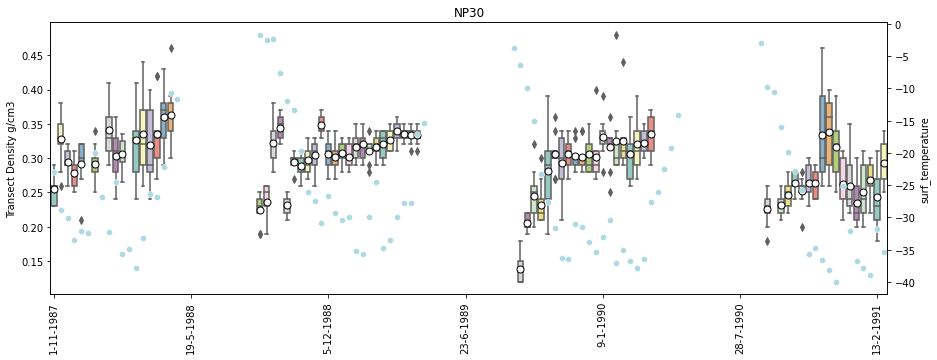

In [17]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df3.iloc[:,4:13].T, ax=ax, showmeans=True, palette="Set3",meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"})

ax2 = ax.twinx()
sns.scatterplot(x=df3.index, y='surf_temperature', data=df3, ax=ax2, ci=None, color='lightblue')

ax.set_ylabel('Transect Density g/cm3')

ax.set_xticks(df3.index[::20])
ax.set_xticklabels(df3.day_month_year[::20], rotation=90)
plt.title('NP30')

plt.show()

# regression

In [18]:
df30.iloc[:,10]

index
1987-11-10    0.258
1987-11-20    0.327
1987-11-30    0.295
1987-12-10    0.278
1987-12-20    0.291
              ...  
1991-01-23    0.231
1991-02-02    0.248
1991-02-12    0.272
1991-02-22    0.250
1991-03-04    0.289
Name: avg, Length: 76, dtype: float64

In [32]:
df4 = pd.DataFrame({"surf_temperature":dm30.surface_temperature, "average_density":df30.iloc[:,10].diff(), "stdv_density":df30.iloc[:,11]}, index=None, columns=None)
df4 = df4.resample('10D').mean()                   

df4 = df4.dropna()
df4 

,surf_temperature,average_density,stdv_density
1987-11-11,-28.850000,0.069,0.034943
1987-11-21,-30.070833,-0.032,0.018574
1987-12-01,-33.450000,-0.017,0.017776
1987-12-11,-32.037500,0.013,0.031129
1987-12-31,-19.941071,-0.005,0.029052
...,...,...,...
1991-01-14,-36.763889,-0.036,0.034482
1991-01-24,-37.786310,0.017,0.037630
1991-02-03,-38.914286,0.024,0.023580
1991-02-13,-31.751548,-0.022,0.044045


In [33]:
sp.stats.linregress(df4.surf_temperature,df4.average_density)
res = sp.stats.linregress(df4.surf_temperature,df4.average_density)
res

LinregressResult(slope=-0.0011582674918416873, intercept=-0.03138170298336842, rvalue=-0.2622066621282852, pvalue=0.023052956411496763, stderr=0.0004989262041530233)

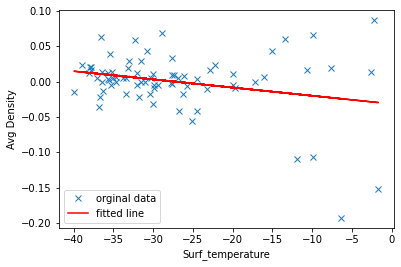

In [34]:
plt.plot(df4.surf_temperature, df4.average_density, 'x', label='orginal data')
plt.plot(df4.surf_temperature, res.intercept + res.slope*df4.surf_temperature, 'r', label='fitted line')

plt.legend()

plt.xlabel('Surf_temperature')
plt.ylabel('Avg Density')
plt.show()

# NP26

# density

In [22]:
import pandas as pd
df26 = pd.read_excel(r'C:\Users\Default\Documents\transect_densities.xlsx', engine='openpyxl', sheet_name='26', index_col=0, parse_dates=True)
df26.loc['avg'] = df26.mean()
df26.loc['stdv'] = df26.std()

df26 = df26.T
df26 = df26.resample('10D').mean()

df26.reset_index(inplace=True)
df26['day'] = df26['index'].dt.day
df26['month'] = df26['index'].dt.month
df26['year'] = df26['index'].dt.year

rols = ['day', 'month', 'year']
df26['day_month_year'] = df26[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

cols = ['month', 'year']
df26['month_year'] = df26[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

df26 = df26.sort_values(by="index")
df26.set_index('index', inplace=True)

df26_boxplot = df26.T

cols = ['month']
df26[cols] = df26[df26[cols] != 5][cols]
df26.dropna(inplace=True)
    
cols = ['month']
df26[cols] = df26[df26[cols] != 6][cols]
df26.dropna(inplace=True)

cols = ['month']
df26[cols] = df26[df26[cols] != 7][cols]
df26.dropna(inplace=True)

cols = ['month']
df26[cols] = df26[df26[cols] != 8][cols]
df26.dropna(inplace=True)

df26

,0,1,2,3,4,avg,stdv,day,month,year,day_month_year,month_year
index,,,,,,,,,,,,
1983-09-08,0.31,0.26,0.24,0.28,0.24,0.266,0.026533,8,9.0,1983,8-9-1983,9-1983
1983-09-18,0.26,0.24,0.23,0.27,0.23,0.246,0.016248,18,9.0,1983,18-9-1983,9-1983
1983-09-28,0.39,0.32,0.35,0.30,0.32,0.336,0.031369,28,9.0,1983,28-9-1983,9-1983
1983-10-08,0.36,0.34,0.28,0.35,0.35,0.336,0.028705,8,10.0,1983,8-10-1983,10-1983
1983-10-18,0.38,0.34,0.38,0.30,0.30,0.340,0.035777,18,10.0,1983,18-10-1983,10-1983
1983-10-28,0.35,0.30,0.35,0.33,0.40,0.346,0.032619,28,10.0,1983,28-10-1983,10-1983
1983-11-07,0.33,0.33,0.32,0.33,0.33,0.328,0.004000,7,11.0,1983,7-11-1983,11-1983
1983-11-17,0.33,0.33,0.31,0.31,0.32,0.320,0.008944,17,11.0,1983,17-11-1983,11-1983
1983-11-27,0.32,0.32,0.32,0.34,0.34,0.328,0.009798,27,11.0,1983,27-11-1983,11-1983


# met data

In [23]:
dm26 = pd.read_table(r"C:\Users\Default\Documents\W99_clean\MET\METNP_26.DAT",sep="\s+", index_col=False, header=None, na_values=9999, names=['station_id', 'year', 'month', 'day','time', 'lat', 'long', 'air_temperature', 'relative_humidity', 'sea_level_pressure', 'wind_direction', 'wind_speed', 'total_cloudiness', 'low_cloudiness', 'surface_temperature'])

dm26.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

cols = ['year', 'month', 'day']
dm26['date'] = dm26[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
dm26['date'] = pd.to_datetime(dm26.date, infer_datetime_format=True)

dm26.set_index('date', inplace=True)

# adding month_year
rols = ['month', 'year']
dm26['month_year'] = dm26[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

dm26 = dm26.resample('D').mean()

cols = ['wind_speed']
dm26[cols] = dm26[dm26[cols] > 0][cols]
dm26.dropna()

dm26

,station_id,year,month,day,time,lat,long,air_temperature,relative_humidity,sea_level_pressure,wind_direction,wind_speed,total_cloudiness,low_cloudiness,surface_temperature
date,,,,,,,,,,,,,,,
1983-09-01,26.0,83.0,9.0,1.0,12.000000,79.526833,177.679167,-3.266667,93.666667,997.116667,267.500000,3.166667,10.000000,1.666667,-2.000000
1983-09-02,26.0,83.0,9.0,2.0,11.571429,79.566143,177.794429,-2.657143,89.000000,999.185714,324.285714,7.285714,10.000000,9.857143,-2.000000
1983-09-03,26.0,83.0,9.0,3.0,10.800000,79.542000,178.017200,-4.720000,86.400000,1003.200000,264.000000,5.800000,9.800000,9.800000,-4.000000
1983-09-04,26.0,83.0,9.0,4.0,12.000000,79.397500,178.111000,-4.600000,87.833333,1005.816667,299.166667,8.833333,9.666667,9.333333,-3.833333
1983-09-05,26.0,83.0,9.0,5.0,12.500000,79.341667,178.080000,-4.233333,94.666667,1006.683333,285.000000,7.166667,10.000000,10.000000,-3.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-02-24,26.0,86.0,2.0,24.0,10.500000,82.444125,174.352000,-40.825000,74.750000,1023.375000,331.250000,3.250000,4.125000,0.000000,-43.125000
1986-02-25,26.0,86.0,2.0,25.0,10.500000,82.451625,174.329250,-40.287500,75.000000,1023.025000,118.750000,2.500000,8.875000,0.000000,-42.250000
1986-02-26,26.0,86.0,2.0,26.0,10.500000,82.481000,174.384875,-38.925000,75.500000,1013.062500,111.875000,4.375000,8.500000,0.000000,-40.000000


# Boxplot

In [24]:
df5 = pd.DataFrame({"surf_temperature":dm26.surface_temperature, "average_density":df26.iloc[:,10], "stdv_density":df30.iloc[:,11], "1":df26.iloc[:,1], "2":df26.iloc[:,2], "3":df26.iloc[:,3], "4":df26.iloc[:,4], "5":df26.iloc[:,5], "6":df26.iloc[:,6], "7":df26.iloc[:,7], "8":df26.iloc[:,8],"9":df26.iloc[:,9]}, index=None, columns=None)
df5 = df5.resample('10D').mean()                   

df5.reset_index(inplace=True)
df5['day'] = df5['index'].dt.day
df5['month'] = df5['index'].dt.month
df5['year'] = df5['index'].dt.year
df5.set_index('index', inplace=False)

rols = ['day','month', 'year']
df5['day_month_year'] = df3[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

df5 

,index,surf_temperature,stdv_density,1,2,3,4,5,6,7,8,9,day,month,year,day_month_year
0,1983-09-01,-4.525000,NaN,0.26,0.24,0.28,0.24,0.266,0.026533,8.0,9.0,1983.0,1,9,1983,1-11-1987
1,1983-09-11,-10.523452,NaN,0.24,0.23,0.27,0.23,0.246,0.016248,18.0,9.0,1983.0,11,9,1983,11-11-1987
2,1983-09-21,-13.036071,NaN,0.32,0.35,0.30,0.32,0.336,0.031369,28.0,9.0,1983.0,21,9,1983,21-11-1987
3,1983-10-01,-14.278810,NaN,0.34,0.28,0.35,0.35,0.336,0.028705,8.0,10.0,1983.0,1,10,1983,1-12-1987
4,1983-10-11,-22.481548,NaN,0.34,0.38,0.30,0.30,0.340,0.035777,18.0,10.0,1983.0,11,10,1983,11-12-1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,1991-01-22,NaN,0.034482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,1,1991,NaN
271,1991-02-01,NaN,0.037630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1991,NaN
272,1991-02-11,NaN,0.023580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2,1991,NaN
273,1991-02-21,NaN,0.044045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,2,1991,NaN


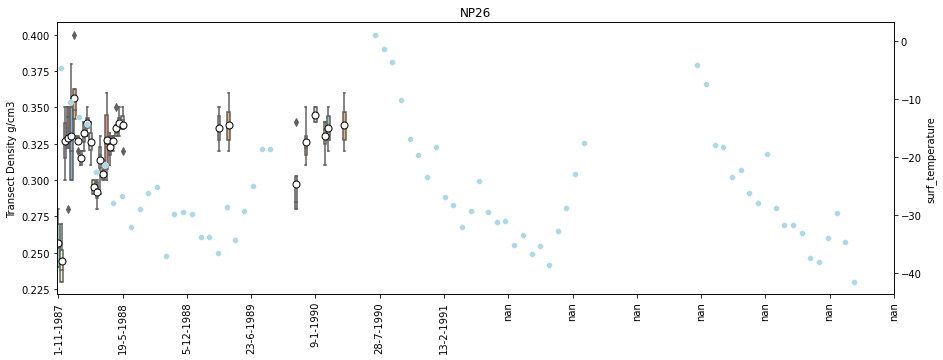

In [25]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df5.iloc[:,4:8].T, ax=ax, showmeans=True, palette="Set3",meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"})

ax2 = ax.twinx()
sns.scatterplot(x=df5.index, y='surf_temperature', data=df5, ax=ax2, ci=None, color='lightblue')

ax.set_ylabel('Transect Density g/cm3')

ax.set_xticks(df5.index[::20])
ax.set_xticklabels(df5.day_month_year[::20], rotation=90)
plt.title('NP26')

plt.show()

# regression

In [29]:
df6 = pd.DataFrame({"surf_temperature":dm26.surface_temperature, "average_density":df26.iloc[:,5].diff(), "stdv_density":df26.iloc[:,6]}, index=None, columns=None)
df6 = df6.resample('10D').mean()                   

df6 = df6.dropna()
df6 

,surf_temperature,average_density,stdv_density
1983-09-11,-10.523452,-2.000000e-02,0.016248
1983-09-21,-13.036071,8.999999e-02,0.031369
1983-10-01,-14.278810,5.960464e-09,0.028705
1983-10-11,-22.481548,4.000002e-03,0.035777
1983-10-21,-21.358214,6.000000e-03,0.032619
1983-10-31,-27.830357,-1.799999e-02,0.004000
1983-11-10,-26.689881,-8.000004e-03,0.008944
1983-11-20,-32.040000,7.999992e-03,0.009798
1983-11-30,-29.008333,1.000001e-02,0.007483
1983-12-10,-26.198214,-1.400000e-02,0.010198


In [30]:
sp.stats.linregress(df6.surf_temperature,df6.average_density)
res = sp.stats.linregress(df6.surf_temperature,df6.average_density)
res

LinregressResult(slope=-0.00017319405748824254, intercept=-0.0019759253171563714, rvalue=-0.056764941973998236, pvalue=0.7741823598538763, stderr=0.0005974000851698618)

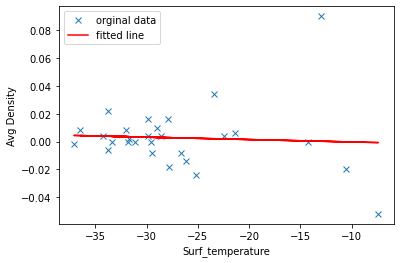

In [31]:
plt.plot(df6.surf_temperature, df6.average_density, 'x', label='orginal data')
plt.plot(df6.surf_temperature, res.intercept + res.slope*df6.surf_temperature, 'r', label='fitted line')

plt.legend()

plt.xlabel('Surf_temperature')
plt.ylabel('Avg Density')
plt.show()